<div class="span5 alert alert-info">
<br/>
Thank you for your consideration! 
<br/>
<br/>
Please see code and plots below for raw analysis. For further guidance and interpretation, please read the blue boxes. Thank you! 
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

# I. Exploring the Database

We begin by asking a few basic questions about the users of this platform. This first
exercise is presented with answers so that you can diagnose any issues you might
have connecting to or working with the data.

In [2]:
# defining file locations

people_person_fn = "data/people_person.csv"
people_testsegmentation_fn = "data/people_testsegmentation.csv"
pets_pet_fn = "data/pets_pet.csv"
services_service_fn = "data/services_service.csv"
conversations_conversation_fn = "data/conversations_conversation.csv"
conversations_conversation_pets_fn = "data/conversations_conversation_pets.csv"
conversations_message_fn = "data/conversations_message.csv"
conversations_review_fn = "data/conversations_review.csv"

In [3]:
# load people_person

people_person = pd.read_csv(people_person_fn)
people_person['date_joined'] = pd.to_datetime(people_person['date_joined']).dt.date
people_person.head()

,id,first_name,last_name,email,channel,date_joined,photo,fee,gender
0,1,Leanora,Allcock,leanora.allcock635@hotmail.com,NaN,2016-08-02,https://placekitten.com/242/269,0.0,f
1,2,Elroy,Blanding,elroy.blanding510@yahoo.com,NaN,2016-08-02,https://placekitten.com/373/320,0.0,m
2,3,Jeanice,Aleman,jeanice.aleman392@hotmail.com,NaN,2016-08-02,https://placekitten.com/238/264,0.0,f
3,4,Tamala,Polhamus,tamala.polhamus146@aol.com,NaN,2016-08-02,https://placekitten.com/220/223,0.0,f
4,5,Alethea,Gubler,alethea.gubler708@aol.com,NaN,2016-08-02,https://placekitten.com/284/339,0.0,f


In [4]:
# load pets_pet

pets_pet = pd.read_csv(pets_pet_fn)
pets_pet.head()

,id,name,description,gender,weight,birthday,plays_cats,plays_children,plays_dogs,spayed_neutered,house_trained,size,owner_id
0,1,Jammie,Morbi fames a mauris elit malesuada platea.,f,76,2016-05-26,1,1,1,1,1,large,12601
1,2,Lonnie,Class magna a libero felis sociosqu.,f,12,2014-05-20,0,1,1,1,0,small,12602
2,3,Emely,Felis class.,m,11,2014-08-21,0,1,1,1,0,small,12602
3,4,Emelia,Fames class egestas mollis risus posuere.,f,35,2013-09-23,1,1,1,0,0,medium,12603
4,5,Jami,Netus augue a congue orci.,m,35,2014-05-13,0,1,1,1,1,medium,12603


In [5]:
# load conversations_conversation 

conversations_conversation = pd.read_csv(conversations_conversation_fn)
conversations_conversation['added'] = pd.to_datetime(conversations_conversation['added']).dt.date
conversations_conversation['booked_at'] = pd.to_datetime(conversations_conversation['booked_at']).dt.date
conversations_conversation.head()

,id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at
0,1,2018-07-26,2018-07-31,5,2018-07-16,120,NaN,64393,4646,NaT,NaN
1,2,2018-08-10,2018-08-16,6,2018-08-01,132,NaN,64392,10126,NaT,NaN
2,3,2018-06-16,2018-06-19,3,2018-06-05,168,NaN,64391,20677,NaT,NaN
3,4,2018-07-13,2018-07-20,7,2018-07-02,490,NaN,64391,3847,NaT,NaN
4,5,2018-07-02,2018-07-07,5,2018-06-21,140,NaN,64389,9982,NaT,NaN


In [6]:
# load services_service

services_service = pd.read_csv(services_service_fn)
services_service['added'] = pd.to_datetime(services_service['added']).dt.date
services_service.head()

,id,service_type,cancellation_policy,can_provide_oral_medication,can_provide_injected_medication,senior_dog_experience,special_needs_experience,takes_small_dogs,takes_medium_dogs,takes_large_dogs,takes_puppies,max_dogs,provider_id,fee,price,added
0,1,boarding,strict,1,1,1,1,0,1,1,1,4,1,0.15,35,2016-08-02
1,2,dog-walking,strict,1,0,1,1,0,0,1,1,5,1,0.15,26,2016-08-02
2,3,boarding,moderate,0,0,1,0,0,0,1,1,2,2,0.15,31,2016-08-02
3,4,dog-walking,strict,1,0,1,0,1,0,0,1,5,2,0.15,27,2016-08-02
4,5,day-care,strict,1,0,1,1,0,1,1,1,5,2,0.15,30,2016-08-02


In [7]:
#how many users have signed up?

len(people_person['id'].unique())

64393

In [8]:
#how many users signed up prior to 2018-02-03?

people_person['date_joined'] = pd.to_datetime(people_person['date_joined'])
people_person_180203 = people_person.loc[people_person['date_joined'] < '2018-02-03', :]
len(people_person_180203['date_joined'])

35826

In [9]:
#what percentage of users have added pets?

owners_w_pets = len(pets_pet['owner_id'].unique())
all_owners = len(people_person['id'].unique())
owners_w_pets/all_owners

0.804326557234482

In [10]:
#of those users, how many pets have they added on average?

pet_counts = pets_pet['owner_id'].value_counts()
np.mean(pet_counts)

1.500781958951982

In [11]:
#what percentage of pets play well with cats?

num_pets = len(pets_pet)
num_pets_cat = pets_pet.loc[pets_pet['plays_cats'] == 1, :].shape[0]
num_pets_cat/num_pets

0.24850122217933873

<div class="span5 alert alert-info">
<br/>
All of the answers matched the provided answers. Looks like we're good to go!
</div>

# III. Recent Daily Booking Rate

The snapshot of this database was taken on 2018-08-02 at midnight and only
contains data reflecting events prior to that date. A junior analyst is investigating
daily booking rate during the days prior to the snapshot and is concerned about an
apparent downward trend. You are tasked with helping them out.
1. First, let's reproduce their results. They tell you that daily booking rate is defined
to be the percentage of conversations created each day that eventually book.
What is the daily booking rate for each of the 90 days prior to the snapshot? Is
there a downward trend?
2. Can you narrate a reason why this trend exists? Is there a reason to be
concerned? Please provide additional data and evidence to justify your position.

In [12]:
# formatting and filtering conversations_conversation

conversations_conversation['added'] = pd.to_datetime(conversations_conversation['added'])
conversations_conversation['booked_at'] = pd.to_datetime(conversations_conversation['booked_at'])
df = conversations_conversation.loc[conversations_conversation['added'] <= '2018-08-02', :]
df.head()

,id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at
0,1,2018-07-26,2018-07-31,5,2018-07-16,120,NaN,64393,4646,NaT,NaN
1,2,2018-08-10,2018-08-16,6,2018-08-01,132,NaN,64392,10126,NaT,NaN
2,3,2018-06-16,2018-06-19,3,2018-06-05,168,NaN,64391,20677,NaT,NaN
3,4,2018-07-13,2018-07-20,7,2018-07-02,490,NaN,64391,3847,NaT,NaN
4,5,2018-07-02,2018-07-07,5,2018-06-21,140,NaN,64389,9982,NaT,NaN


In [13]:
# get booking rate, number of conversations, number of bookings for the last 90 days

def get_daily_booking_rate(df):
    dates = np.sort(df['added'].unique())[-90:]
    rates = []
    books = []
    totals = []
    for date in dates:
        total = df.loc[df['added'] == date, :].shape[0]
        booked = df.loc[(df['added'] == date) & (df['booked_at'].notnull()), :].shape[0]
        rate = booked/total
        rates.append(rate)
        books.append(booked)
        totals.append(total)
    return pd.DataFrame({'dates':dates, 'rates':rates, 'totals':totals, 'books':books})

daily_booking_rate = get_daily_booking_rate(df)

C:\Users\v-chlert\AppData\Local\conda\conda\envs\ftk\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


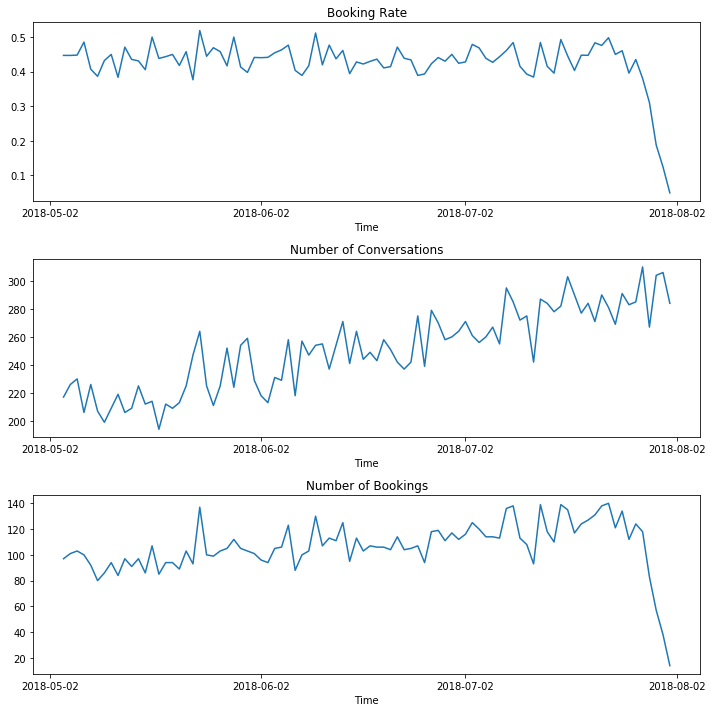

In [14]:
# plot booking rate, number of conversations, number of bookings for the last 90 days

x_ticks = ['2018-05-02','2018-06-02', '2018-07-02', '2018-08-02']
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
plt.plot(daily_booking_rate['dates'], daily_booking_rate['rates'])
plt.title('Booking Rate')
plt.xlabel('Time')
plt.xticks(x_ticks, x_ticks)


plt.subplot(3,1,2)
plt.plot(daily_booking_rate['dates'], daily_booking_rate['totals'])
plt.title('Number of Conversations')
plt.xlabel('Time')
plt.xticks(x_ticks, x_ticks)


plt.subplot(3,1,3)
plt.plot(daily_booking_rate['dates'], daily_booking_rate['books'])
plt.title('Number of Bookings')
plt.xlabel('Time')
plt.xticks(x_ticks, x_ticks)


plt.tight_layout()
plt.style.use('ggplot')
plt.tight_layout()
plt.show()

<div class="span5 alert alert-info">
<h3>Investigating Daily Booking Rate</h3>
<br/>
The daily booking rate is defined to be the percentage of conversations created each day that eventually book. To investigate daily booking rate, we're looking at both number of conversations created and number of bookings. Looking at the plots above, we can see that booking rate decreased due to the decrease in number of bookings. 
</div>

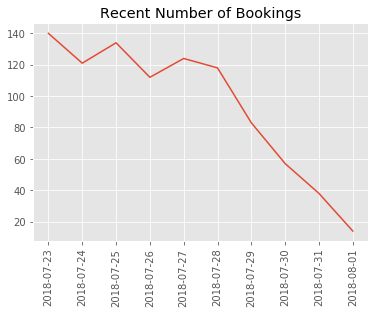

In [15]:
# plot number of bookings in the last 10 days

recent_books = daily_booking_rate['books'][-10:]
recent_books_dates = daily_booking_rate['dates'][-10:]
plt.plot(recent_books_dates, recent_books)
plt.xticks(rotation = 90)
plt.title('Recent Number of Bookings')
plt.show()

In [16]:
# investigate average number of days it takes from starting a conversation to booking

num_days_till_booked = conversations_conversation.copy(deep=True)
num_days_till_booked = num_days_till_booked.loc[num_days_till_booked['booked_at'].notnull(), :]

def get_diff(row):
    diff = (row['booked_at'] - row['added']).days
    return diff

num_days_till_booked.apply(get_diff, axis=1).mean()

3.2349249985059463

<div class="span5 alert alert-info">
<h3>Recent Daily Number of Bookings</h3>
<br/>
To further investigate, we're looking at the daily number of booking and noticed that the number has been trending downward only during the past couple days! 
<br/>
<br/>
This is the phenomenon statisticians called "right censoring". The catch is that people don't always book a service on the same day they initiated a conversation. Since the data we're looking at is a snapshot of the database on 2018-08-02, we haven't had a chance to observe whether recent conversations led to bookings yet. We went ahead and calculated the average time it takes for our customers to book a service after they initiated a conversation. It's shown that on average, it takes about 3.2 days. That's why booking rates a few days prior to 2018-08-02 look funky! There's nothing to worry about! 
</div>

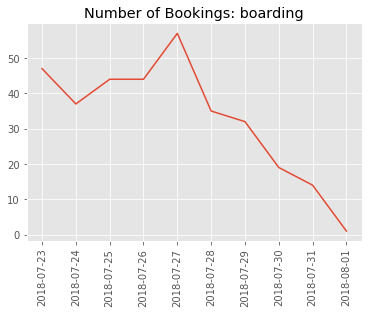

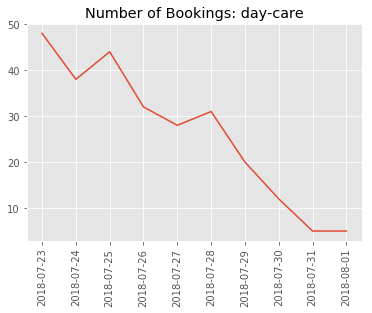

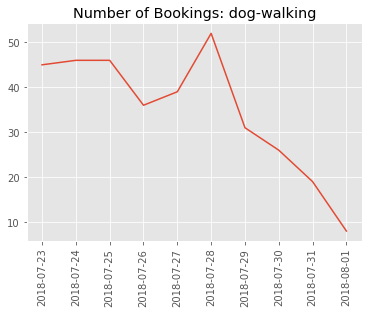

In [17]:
# segmenting different service types to take a closer look

df_recent = conversations_conversation.loc[(conversations_conversation['added'] >= '2018-07-23') & (conversations_conversation['added'] <= '2018-08-01')]
df_recent = pd.merge(df_recent, services_service, left_on='service_id', right_on='id')
df_recent_booked = df_recent.loc[df_recent['booked_at'].notnull(), :]

def plot_segment(df, groupby):
    df = df.reset_index()
    segments = df[groupby].unique()
    for group in segments:
        temp = df.loc[df[groupby] == group, :]
        plt.plot(temp['added_x'], temp['id_x'])
        plt.title('Number of Bookings: ' + str(group))
        plt.xticks(rotation = 90)
        plt.show()
        
segment_service_type = df_recent_booked[['service_type', 'id_x', 'added_x']].groupby(['service_type', 'added_x']).count().sort_values(['service_type', 'added_x'])
plot_segment(segment_service_type, 'service_type')

<div class="span5 alert alert-info">
<h3>Segmentation by Service Type </h3>
<br/>
Just to make sure there's really nothing funky going on, we're looking at number of bookings for each of the service type. It looks like the downward trend happened across all service types. This helps to further convince us that the booking rate decreased simply because of right censorship. 
</div>

# IV.Analyzing Take Rate

In order to do the next exercise, you will need to understand the fee structure for this
company. Each user has a fee associated with their account (recorded on
people_person ). If that user books as an owner, the company charges a service fee
(in addition to the booking total) that is a percentage of the booking total (to a
maximum of 50). Also, each service has a fee amount (recorded on
services_service ). Before a provider receives their payment, the company takes a
percentage of the booking total as dictated by that fee. As an example, suppose an
owner has a fee amount of 5 and books with a service that has a fee amount of
15\%. If the booking was for 100, then the owner would get charged 105 (adding
the ownerʼs fee). The 5 owner fee would go to the company. An additional 15
would also go to the company since the service had a 15 fee associated to it. The
remaining 85 would go to the provider.

1. In each month, what were the gross billings and net revenue?
2. Define take rate to be the percentage of gross billings that is net revenue. In the
previous example, the take rate is slightly more than 19% since $20/$105 is
approximately 0.1905. In each month, what was the aggregate take rate?
3. Did take rate trend up or trend down or remain unchanged over time?
4. If it did change, investigate why and provide an explanation. Be sure to provide
additional data/charts/evidence that justify your explaination. Any claims should
be backed by data.

In [18]:
# joining conversations_conversation, people_person, and services_service tables then drop unnecessary columns

df = conversations_conversation.drop(['start_date', 'end_date', 'units', 'cancellation_fault'], axis='columns')
df = df.loc[(df['booked_at'].notnull()) & df['cancelled_at'].isnull(), :]
df = pd.merge(df, people_person, left_on='requester_id', right_on='id')
df = df.drop(['first_name', 'last_name', 'email', 'channel', 'photo', 'gender', 'id_y'], axis='columns')
df = pd.merge(df, services_service[['fee', 'provider_id', 'id', 'added']], left_on='service_id', right_on='id')
df = df.drop(['cancelled_at', 'id'], axis=1)
df = df.rename(columns={'id_x':'id_convo', 'fee_x':'fee_people', 'fee_y':'fee_service', 'added_y':'date_added_service', 'added_x':'date_added_convo', 'date_joined':'date_added_ppl'})
df = df.set_index('booked_at')
df.head()

,id_convo,date_added_convo,booking_total,requester_id,service_id,date_added_ppl,fee_people,fee_service,provider_id,date_added_service
booked_at,,,,,,,,,,
2018-06-27,6,2018-06-23,78,64388,14772,2018-06-22,0.07,0.2,8690,2018-05-19
2018-07-16,43003,2018-07-15,104,36131,14772,2018-07-11,0.07,0.2,8690,2018-05-19
2018-07-22,7,2018-07-21,100,64386,14783,2018-07-20,0.07,0.2,8698,2018-01-20
2018-06-24,2786,2018-06-18,75,61843,14783,2018-03-07,0.07,0.2,8698,2018-01-20
2018-02-21,35058,2018-02-17,250,41209,14783,2017-04-03,0.05,0.2,8698,2018-01-20


In [19]:
# calculate net revenue, gross billing, and take rate for each instance of conversation

df['rev'] = (df['booking_total']*df['fee_service']) + (df['booking_total']*df['fee_people'])
df['gross_billings'] = (df['booking_total']*df['fee_people']) + df['booking_total']
df['take_rate'] = df['rev']/df['gross_billings']
df['date_added_ppl'] = pd.to_datetime(df['date_added_ppl'])
df['date_added_service'] =  pd.to_datetime(df['date_added_service'])
df = df.sort_index()
df.head()

,id_convo,date_added_convo,booking_total,requester_id,service_id,date_added_ppl,fee_people,fee_service,provider_id,date_added_service,rev,gross_billings,take_rate
booked_at,,,,,,,,,,,,,
2016-08-13,69450,2016-08-10,44,19318,47,2016-08-09,0.02,0.15,25,2016-08-02,7.48,44.88,0.166667
2016-08-15,67789,2016-08-13,88,20399,61,2016-08-09,0.02,0.15,34,2016-08-02,14.96,89.76,0.166667
2016-08-16,40864,2016-08-11,546,37499,21,2016-08-09,0.02,0.15,11,2016-08-02,92.82,556.92,0.166667
2016-08-18,14213,2016-08-14,72,54596,146,2016-08-11,0.02,0.15,84,2016-08-02,12.24,73.44,0.166667
2016-08-18,78492,2016-08-11,63,13673,17,2016-08-10,0.02,0.15,9,2016-08-02,10.71,64.26,0.166667


In [20]:
# calculating monthly gross billing and revenue

gross_billing = df[['gross_billings']].resample('M').sum()
net_rev = df[['rev']].resample('M').sum()
gb_nr = pd.concat([gross_billing,net_rev], axis=1)[:-1]
gb_nr

,gross_billings,rev
booked_at,,
2016-08-31,3810.72,635.12
2016-09-30,16478.10,2746.35
2016-10-31,28833.36,4805.56
2016-11-30,38414.22,6402.37
2016-12-31,51103.98,8575.93
2017-01-31,69952.14,12943.49
2017-02-28,82967.76,15410.61
2017-03-31,115218.81,21550.51
2017-04-30,122019.60,22890.05


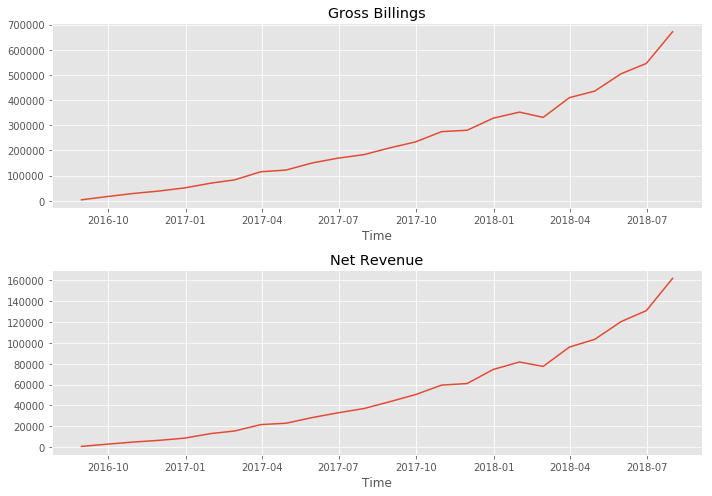

In [21]:
# plotting gross billings and net revenue

plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
plt.plot(gb_nr.index, gb_nr['gross_billings'])
plt.title('Gross Billings')
plt.xlabel('Time')

plt.subplot(2,1,2)
plt.plot(gb_nr.index, gb_nr['rev'])
plt.title('Net Revenue')
plt.xlabel('Time')

plt.tight_layout()
plt.style.use('ggplot')
plt.tight_layout()
plt.show()

<div class="span5 alert alert-info">
<h3>Gross Billings & Net Revenue</h3>
<br/>
From plots above, both gross billings and net revenue seemed to grow exponentially. Both didn't have any obvious seasonality when aggregated at monthly level.
</div>

In [22]:
# calculating average take rate by month (aggregated based on booked_at)

take_rate = df['take_rate'].resample('M').mean()
#fee_people = df['fee_people'].resample('M').mean()
#fee_service = df['fee_service'].resample('M').mean()
take_rate_df = pd.concat([take_rate], axis=1)[:-1]
take_rate_df

,take_rate
booked_at,
2016-08-31,0.166667
2016-09-30,0.166667
2016-10-31,0.166667
2016-11-30,0.166667
2016-12-31,0.167592
2017-01-31,0.185256
2017-02-28,0.185566
2017-03-31,0.187376
2017-04-30,0.187509


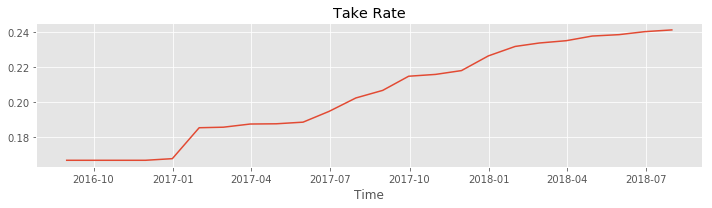

In [23]:
# plotting average take rate by month

plt.figure(figsize=(10,3))

plt.plot(take_rate_df.index, take_rate_df['take_rate'])
plt.title('Take Rate')
plt.xlabel('Time')

plt.tight_layout()
plt.style.use('ggplot')
plt.tight_layout()
plt.show()

<div class="span5 alert alert-info">
<h3>Take Rate</h3>
<br/>
Take rate also seemed to trend up. However, the curve isn't smooth. It seemed to be a piecewise-defined function. The rate changes around 2017-01, 2017-06, and 2018-01. Since take rate is defined to be the percentage of gross billings that is net revenue, we're going to look at the owner fee and service fee to further investigate. 
</div>

In [24]:
# calculating average service fee by month and owner fee by month (aggregated based on date_added)

df_date_added_ppl = df.set_index('date_added_ppl')
df_date_added_service = df.set_index('date_added_service')

fee_service_df = df_date_added_service.resample('M').mean()
fee_people_df = df_date_added_ppl.resample('M').mean()

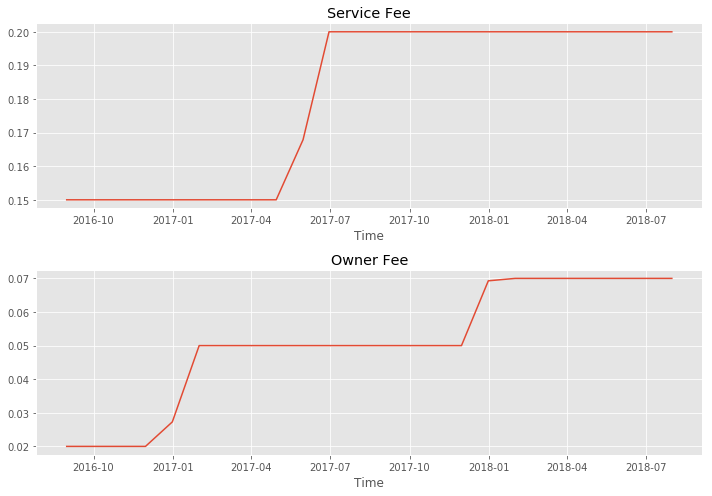

In [25]:
# plotting average service fee and owner fee 

plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
plt.plot(fee_service_df.index, fee_service_df['fee_service'])
plt.title('Service Fee')
plt.xlabel('Time')

plt.subplot(2,1,2)
plt.plot(fee_people_df.index, fee_people_df['fee_people'])
plt.title('Owner Fee')
plt.xlabel('Time')

plt.tight_layout()
plt.style.use('ggplot')
plt.tight_layout()
plt.show()

<div class="span5 alert alert-info">
<h3>Service Fee & Owner Fee</h3>
<br/>
Because both service fee and owner fee were both stepwise-defined functions, it made a lot of sense that take rate is also a stepwise function. Service fee changed from 15% to 20% in 2017-06 and owner fee changed from 2% to 5% in 2017-01 and from 5% to 7% in 2018-01. That's why we saw that take rate grew in a stepwise manner!
</div>

# VI. Search Engine Marketing

Search engine advertising is a huge driver of new user accounts. Users that are
aquired through search engine marketing can be identified by looking at
people_person.channel . These users will have 'Google' listed there. Historically,
this company spent an average of 30 per account to advertise in the 2nd position
on Google. However, on 2018-05-04 , they decided to start bidding for the 1st
position. Since 2018-05-04 , they have spent 207180 in total.
1. For each day, determine the count of users that joined and were acquired
through Google. Plot this and confirm there is an inflection point on or near
2018-05-04 .
2. How many users were acquired via Google advertising since 2018-05-04 and
what was the average cost per account?
3. Estimate how many users would have been acquired had the company not
changed its bidding strategy. What would have been the marketing spend in that
case?
4. How many additional accounts where created? What was the marginal cost per
account for these additional accounts?

In [26]:
# get accounts aquired through search engine

google = people_person.copy(deep=True)
google = google.loc[google['channel'] == 'Google', :]
google['date_joined'] = pd.to_datetime(google['date_joined'])
google.set_index('date_joined', inplace=True)
google.head()

,id,first_name,last_name,email,channel,photo,fee,gender
date_joined,,,,,,,,
2018-01-16,105,Serena,Turlich,serena.turlich505@yahoo.com,Google,https://placekitten.com/355/233,0.07,f
2018-05-19,119,Terra,Kemna,terra.kemna187@gmail.com,Google,https://placekitten.com/311/214,0.07,f
2018-05-05,121,Marcus,Defrain,marcus.defrain955@hotmail.com,Google,https://placekitten.com/251/298,0.07,m
2017-12-18,125,Shona,Macedo,shona.macedo803@aol.com,Google,https://placekitten.com/338/228,0.07,f
2017-04-17,127,Cammy,Eberth,cammy.eberth393@hotmail.com,Google,https://placekitten.com/278/390,0.05,f


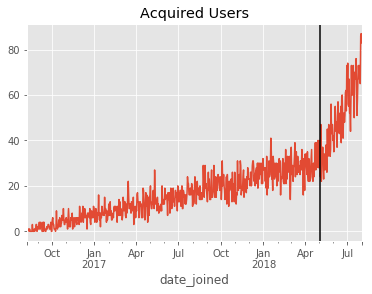

In [27]:
# calculate customer acquisition rate (daily)

user_count_d = google.resample('D').count()[['id']].sort_index()

# plot customer acquisition rate (daily)

user_count_d.plot(legend=False)
plt.axvline('2018-05-04', color = 'k')
plt.style.use('ggplot')
plt.title('Acquired Users')
plt.show()

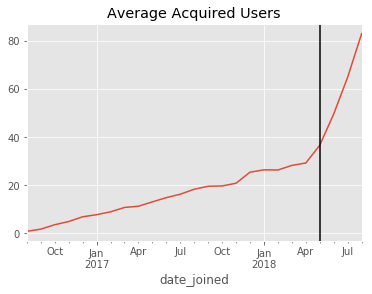

In [28]:
# calculate average customer acquisition rate 

user_count_ad = user_count_d.resample('M').mean()

# plot average customer acquisition rate

user_count_ad.plot(legend=False)
plt.axvline('2018-05-04', color = 'k')
plt.style.use('ggplot')
plt.title('Average Acquired Users')
plt.show()

<div class="span5 alert alert-info">
<h3>Acquired Users</h3>
<br/>
Looking at the count of acquired users for each day, we can see that after the company changed bidding strategy, there is an inflection point near 2018-05-04 (black vertical line). To get a clearer look at the trend, we've also plotted the average acquired users for each month. Looking at this plot, it's very clear that acquired user count grows a lot more rapidly after the change.
</div>

In [29]:
# get accounts acquired after moving to 1st position

google_first = people_person.copy(deep=True)
google_first = google_first.loc[google_first['channel'] == 'Google', :]
google_first['date_joined'] = pd.to_datetime(google_first['date_joined'])
google_first = google_first.loc[google_first['date_joined'] >= '2018-05-04', :]
google_first.set_index('date_joined', inplace=True)
google_first.sort_index(inplace=True)
google_first.head()

,id,first_name,last_name,email,channel,photo,fee,gender
date_joined,,,,,,,,
2018-05-04,52606,Lou,Pospisil,lou.pospisil795@gmail.com,Google,https://placekitten.com/265/357,0.07,m
2018-05-04,42258,Shantell,Munnerlyn,shantell.munnerlyn593@rover.com,Google,https://placekitten.com/371/276,0.07,f
2018-05-04,21058,Matt,Laaker,matt.laaker396@rover.com,Google,https://placekitten.com/324/222,0.07,m
2018-05-04,7053,Leticia,Gillooly,leticia.gillooly228@hotmail.com,Google,https://placekitten.com/240/334,0.07,f
2018-05-04,40453,Magali,Duffney,magali.duffney192@yahoo.com,Google,https://placekitten.com/213/345,0.07,f


In [30]:
# number of accounts acquired after moving to 1st position

len(google_first['id'].unique())

4604

In [31]:
# average cost per account

207180/4604

45.0

<div class="span5 alert alert-info">
<h3>Cost Per Account After 2018-05-04</h3>
<br/>
From the data provided, the company acquired 4,604 users since 2018-05-04. Knowing that the company spent \$207,180 to advertise in the 1st position since 2018-05-04, the new average cost per account is \$45.
</div>

In [32]:
# forecasting number of accounts acquired, assuming company didn't change bidding strategy using ARIMA model

def fit_arima(train, test):
    forecasts = []
    test = test.copy(deep=True)
    for i in range(len(test)):
        model = ARIMA(train, order=(2,1,0), freq='M')
        model_fit = model.fit(disp=0)
        forecast = model_fit.forecast()[0]
        forecasts.append(forecast[0])
        test.iloc[i] = forecast
        train = pd.concat([train, test.iloc[[i], :]])
    return [forecasts, test]

user_count_m = google.resample('M').count()[['id']].sort_index()[:-1]
train = user_count_m.loc[:'2018-04-30']
predict = user_count_m.loc['2018-05-31':]
forecasts, forecast_df = fit_arima(train, predict)

C:\Users\v-chlert\AppData\Local\conda\conda\envs\ftk\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


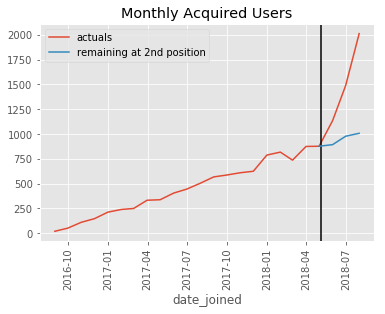

In [33]:
# plot forecasts

forecast_df = pd.concat([forecast_df, train.iloc[[-1], :]])
forecast_df.sort_index(inplace=True)

plt.plot(user_count_m.index, user_count_m, label='actuals')
plt.axvline('2018-05-04', color = 'k')
plt.plot(forecast_df.index, forecast_df, label='remaining at 2nd position')
plt.style.use('ggplot')
plt.title('Monthly Acquired Users')
plt.xticks(rotation = 90)
plt.xlabel('date_joined')
plt.legend()
plt.show()

In [34]:
# number of users acquired had the company not changed bidding strategy (from beginning of 2018-05)

int(sum(forecasts))

2878

In [35]:
# marketing spend had the company not changed bidding strategy (from beginning of 2018-05)

int(sum(np.array(forecasts)*30))

86357

<div class="span5 alert alert-info">
<h3>Difference in Acquired Users</h3>
<br/>
We've used data prior to 2018-05-04 to train ARIMA model and forcasted acquired users for 2018-05, 2018-06 and 2018-07 month ends, assuming the company didn't change the bidding strategy. The forecast showed that the company would have acquired 2,878 users instead of 4,604 users if they continued to advertised in the 2nd position. However, the company would have only spent \$86,357 for the advertisement (assuming cost per account remains at \$30 for 2nd position) instead of \$207,180. 
</div>

In [36]:
# number of additional accounts created after changing bidding strategy

4604-2878

1726

In [37]:
# marginal cost per account

(207180-86357)/1726

70.00173812282735

<div class="span5 alert alert-info">
<h3>Marginal Cost Per Account</h3>
<br/>
Changing bidding strategy let the company gain 1,726 additional users in 3 months. However, the company had to pay $120,823 more for marketing cost. With those findings, the marginal cost per account is calculated to be \$70.  
</div>